*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

Consider the model with interactions and transformation developed previously.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
trainf = pd.read_csv('./Datasets/Car_features_train.csv')
trainp = pd.read_csv('./Datasets/Car_prices_train.csv')
testf = pd.read_csv('./Datasets/Car_features_test.csv')
testp = pd.read_csv('./Datasets/Car_prices_test.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


In [9]:
ols_object = smf.ols(formula = 'price~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:06:56   Log-Likelihood:                -51911.
No. Observations:                4960   AIC:                         1.038e+05
Df Residuals:                    4948   BIC:                         1.039e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.282e+06   7.14e+05     -1.795      0.073   -2.68e+06    1.18e+05
year                 632.3954    353.865      1.787      0.074     -61.338    1326.128
engineSize         -1.465e+06   1.61e+05     -9.129      0.000   -1.78e+06   -1.15e+06
mileage               56.4581      3.811     14.815      0.000      48.987      63.929
mpg                -2.951e+04   9550.775     -3.089      0.002   -4.82e+04   -1.08e+04
year:engineSize      735.8074     79.532      9.252      0.000     579.890     891.725
year:mileage          -0.0281      0.002    -14.898      0.000      -0.032      -0.024
year:mpg              14.6915      4.731      3.105      0.002       5.417      23.966
engineSize:mileage    -0.0808      0.011     -7.143      0.000      -0.103      -0.059
engineSize:mpg      -120.5780     11.384    -10.592      0.000    -142.896     -98.260
mileage:mpg            0.0026      0.000      5.173      0.000       0.002       0.004
I(mileage ** 2)     3.495e-07   1.56e-07      2.236      0.025    4.31e-08    6.56e-07
==============================================================================
Omnibus:                     1958.631   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44560.042
Skew:                           1.349   Prob(JB):                         0.00
Kurtosis:                      17.434   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
np.sqrt(model.mse_resid)

8502.851955843495

In [6]:
#Computing RMSE on test data
pred_price = model.predict(testf)
np.sqrt(((testp.price - pred_price)**2).mean())

8708.676318160937

Let us check if this model satisfies the assumptions of the linear regression model

## Non-linearity of data

We have assumed that there is a linear relationship between the predictors and the response. Residual plots, which are scatter plots of residuals vs fitted values, can be used to identify non-linearity. Fitted values are the values estimated by the model on training data, denoted by $\hat y_i$, and residuals are given by $e_i = y_i - \hat y_i$.

Text(0, 0.5, 'Residuals')

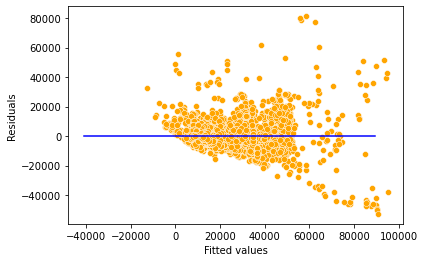

In [119]:
#Plotting residuals vs fitted values
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

The model seems to satisfy this assumption, as we do not observe a strong pattern in the residuals. Residuals lie more or less equally on both sides of the blue line for all fitted values.

**What to do if there is non-linear association** (page 94 of book): If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $log X, \sqrt X$, and $X^2$, in the regression model.

## Non-constant variance of error terms

The variance of the error terms is assumed to be constant, i.e., $Var(\epsilon_i) = \sigma^2$, and this assumption is used while deriving the standard errors of the regression coefficients. The standard errors in turn are used to test the significant of the predictors, and obtain their confidence interval. Thus, violation of this assumption may lead to incorrect inference. Non-constant variance of error terms, or violation of the constant variance assumption, is called *heteroscedasticity.*

This assumption can be checked by plotting the residuals against fitted values.

Text(0, 0.5, 'Residuals')

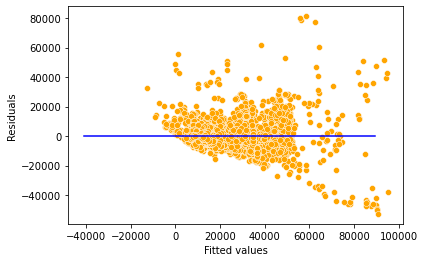

In [124]:
#Plotting residuals vs fitted values
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We see that the variance of errors seems to increase with increase in the fitted values. In such a case a log transformation of the response can resolve the issue to some extent. This is because a log transform will result in a higher shrinkage of larger values.

In [3]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1834.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:19:41   Log-Likelihood:                -1173.8
No. Observations:                4960   AIC:                             2372.
Df Residuals:                    4948   BIC:                             2450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -238.2125     25.790     -9.237      0.000    -288.773    -187.652
year                   0.1227      0.013      9.608      0.000       0.098       0.148
engineSize            13.8349      5.795      2.387      0.017       2.475      25.195
mileage                0.0005      0.000      3.837      0.000       0.000       0.001
mpg                   -1.2446      0.345     -3.610      0.000      -1.921      -0.569
year:engineSize       -0.0067      0.003     -2.324      0.020      -0.012      -0.001
year:mileage        -2.67e-07    6.8e-08     -3.923      0.000      -4e-07   -1.34e-07
year:mpg               0.0006      0.000      3.591      0.000       0.000       0.001
engineSize:mileage -2.668e-07   4.08e-07     -0.654      0.513   -1.07e-06    5.33e-07
engineSize:mpg         0.0028      0.000      6.842      0.000       0.002       0.004
mileage:mpg         7.235e-08   1.79e-08      4.036      0.000    3.72e-08    1.08e-07
I(mileage ** 2)     1.828e-11   5.64e-12      3.240      0.001    7.22e-12    2.93e-11
==============================================================================
Omnibus:                      711.515   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2545.807
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       6.220   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the coefficient of *year* turns out to be significant (at 5% significance level), unlike in the previous model. Intuitively, the coefficient of *year* should have been significant, as *year* has the highest linear correlation of 50% with car *price*. 

Although the R-squared has increased as compared to the previous model, violation of this assumption does not cause bias in the regression coefficients. Thus, there may not be a large improvement in the model fit, unless we add predictor(s) to address heteroscedasticity.

Let us check the constant variance assumption again.

Text(0, 0.5, 'Residuals')

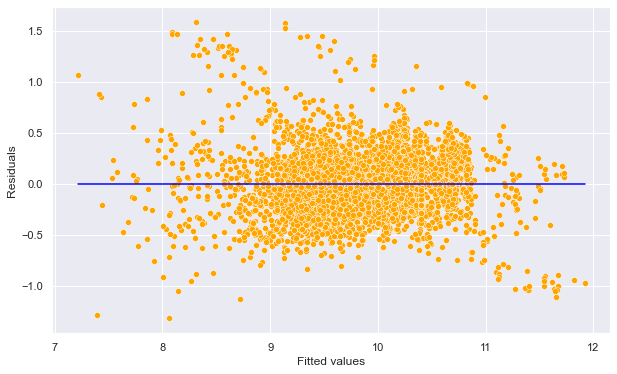

In [145]:
#Plotting residuals vs fitted values
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Now we observe that the constant variance assumption is satisfied. Let us see the RMSE of this model on test data.

In [146]:
#Computing RMSE on test data
pred_price_log = model_log.predict(testf)
np.sqrt(((testp.price - np.exp(pred_price_log))**2).mean())

9094.209503063496

Note that the RMSE of the log-transformed model has increased as compared to the model without transformation. Does it mean the log-transformed model is less accurate?

0.5572604790419161

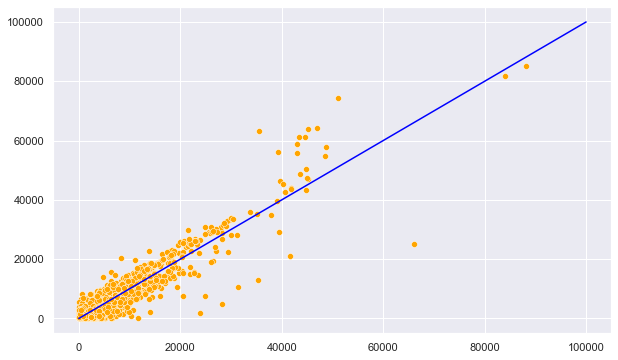

In [147]:
#Comparing errors of the log-transformed model with the previous model
err = np.abs(testp.price - pred_price)
err_log = np.abs(testp.price - np.exp(pred_price_log))
sns.scatterplot(x = err,y = err_log, color = 'orange')
sns.lineplot(x = [0,100000], y = [0,100000], color = 'blue')
np.sum(err_log<err)/len(err)

For 56% of the cars, the log transformed makes a more accurate prediction than the previous model, which seems to indicate that the log-transformed model may be slightly more accurate. However, the conclusion based on RMSE is different. This is because RMSE is an overall measure of prediction accuracy, which can be influenced by a few values since it is based on mean (a non-robust statistic). Thus, RMSE should not be used as the sole measure to compare the accuracy of models.

[Text(0.5, 0, 'log price'), Text(0, 0.5, 'Count')]

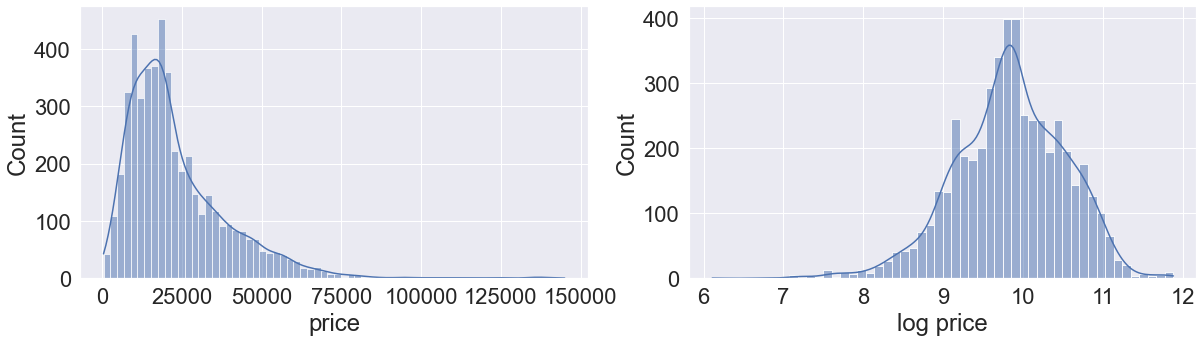

In [149]:
#Visualizing the distribution of price and log(price)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(rc = {'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = fig.add_subplot(2, 2, 1)
sns.histplot(train.price,kde=True)
ax.set(xlabel='price', ylabel='Count')
ax = fig.add_subplot(2, 2, 2)
sns.histplot(np.log(train.price),kde=True)
ax.set(xlabel='log price', ylabel='Count')

We can see that the log transformation shrinked the higher values of price, making its distribution closer to normal.

Note that heterscedasticity can also occur due to model misspecification, i.e., in case of missing predictor(s). Some of the cars are too expensive, which makes the *price* distribution skewed. Perhaps, the price of expensive cars be better explained by the car *model*, a prdeictor that is missing in the current model.